# Data Preprocessing

## Membaca Dataset

In [1]:
# Import Library dan Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('C:\Python\\climate_change_agriculture_dataset.csv', sep=',')
df

,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health,Extreme Weather Events,Crop Disease Incidence,Water Availability,Food Security,Economic Impact
0,7,59,329,483,10,Drought,Low,High,Low,High
1,39,20,426,679,8,Heatwave,High,Low,High,Low
2,18,46,403,587,5,Flood,Low,Medium,Low,Medium
3,9,91,356,220,5,Heatwave,Medium,Medium,High,Medium
4,35,12,325,538,1,Storm,Medium,Medium,High,High
...,...,...,...,...,...,...,...,...,...,...
995,6,63,367,648,5,Heatwave,Medium,Low,High,Low
996,10,26,428,644,7,Flood,High,Medium,Low,Low
997,28,41,339,263,10,Drought,Low,Low,High,Low
998,42,31,372,530,2,Storm,Low,Medium,Low,Low


In [3]:
# Melihat ukuran DataFrame
df.shape

(1000, 10)

In [4]:
# Melihat informasi DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Temperature             1000 non-null   int64 
 1   Precipitation           1000 non-null   int64 
 2   CO2 Levels              1000 non-null   int64 
 3   Crop Yield              1000 non-null   int64 
 4   Soil Health             1000 non-null   int64 
 5   Extreme Weather Events  1000 non-null   object
 6   Crop Disease Incidence  1000 non-null   object
 7   Water Availability      1000 non-null   object
 8   Food Security           1000 non-null   object
 9   Economic Impact         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
# Mengecek apakah terdapat missing value
df.isnull().sum().sort_values(ascending=False)

Temperature               0
Precipitation             0
CO2 Levels                0
Crop Yield                0
Soil Health               0
Extreme Weather Events    0
Crop Disease Incidence    0
Water Availability        0
Food Security             0
Economic Impact           0
dtype: int64

In [6]:
# Mengecek apakah terdapat nilai duplikat
df.duplicated().sum()

0

## Mendeteksi Outlier

<Axes: xlabel='Temperature'>

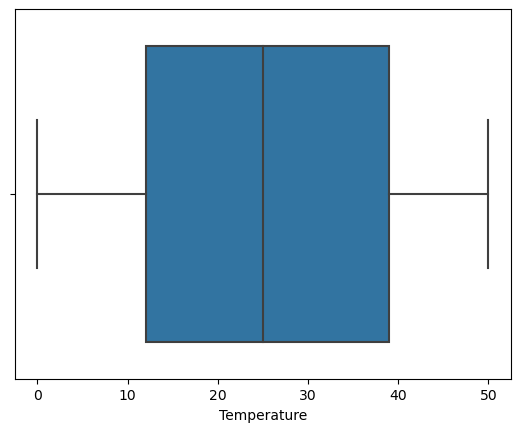

In [7]:
# Mendeteksi outlier pada kolom Temperature
sns.boxplot(data=df, x="Temperature")

In [8]:
# Kesimpulan
"""Dapat dilihat pada gambar di atas bahwa pada kolom temperature tidak terdapat outlier sehingga data tersebut relatif konsisten."""

'Dapat dilihat pada gambar di atas bahwa pada kolom temperature tidak terdapat outlier sehingga data tersebut relatif konsisten.'

<Axes: xlabel='Precipitation'>

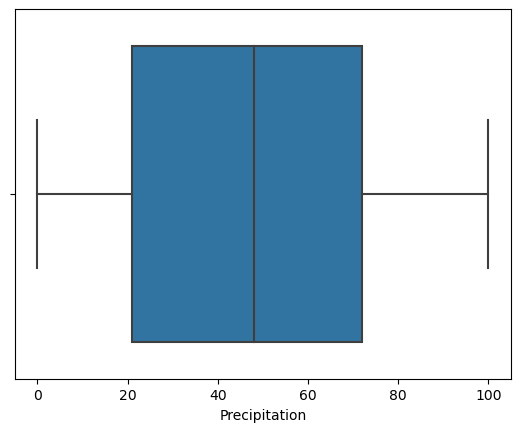

In [9]:
# Mendeteksi outlier pada kolom Precipitation
sns.boxplot(data=df, x="Precipitation")

In [10]:
# Kesimpulan
"""Dapat dilihat pada gambar di atas bahwa pada kolom precipitation tidak terdapat outlier sehingga data tersebut relatif konsisten."""

'Dapat dilihat pada gambar di atas bahwa pada kolom precipitation tidak terdapat outlier sehingga data tersebut relatif konsisten.'

<Axes: xlabel='CO2 Levels'>

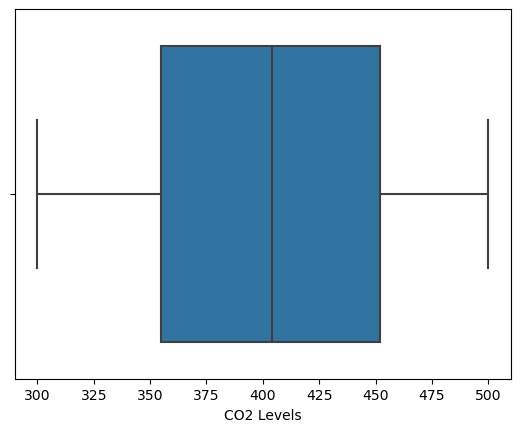

In [11]:
# Mendeteksi outlier pada kolom CO2 Levels
sns.boxplot(data=df, x="CO2 Levels")

In [12]:
# Kesimpulan
"""Dapat dilihat pada gambar di atas bahwa pada kolom CO2 Levels tidak terdapat outlier sehingga data tersebut relatif konsisten."""

'Dapat dilihat pada gambar di atas bahwa pada kolom CO2 Levels tidak terdapat outlier sehingga data tersebut relatif konsisten.'

<Axes: xlabel='Crop Yield'>

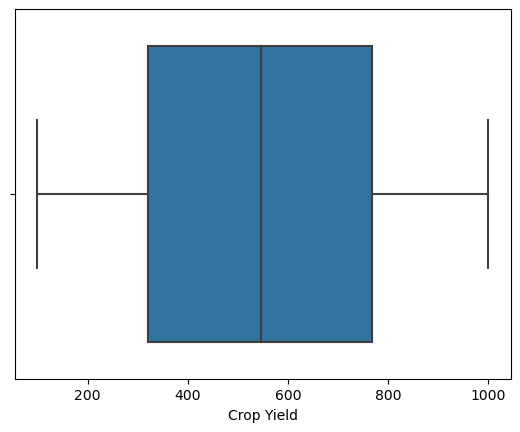

In [13]:
# Mendeteksi outlier pada kolom Crop Yield
sns.boxplot(data=df, x="Crop Yield")

In [14]:
# Kesimpulan
"""Dapat dilihat pada gambar di atas bahwa pada kolom crop yield tidak terdapat outlier sehingga data tersebut relatif konsisten."""

'Dapat dilihat pada gambar di atas bahwa pada kolom crop yield tidak terdapat outlier sehingga data tersebut relatif konsisten.'

# Data Preparation

## Mengubah Data Kategorikal Menjadi Numerik

In [15]:
# Fungsi untuk mengubah jenis cuaca ke nomor kategorikal
# Heatwave (Gelombang Panas) = 0, Drought (Kekeringan) = 1, Storm (Badai) = 2, Flood (Banjir) = 3
def konversi_cuaca(cuaca):
    if cuaca == "Heatwave":
        return 0
    elif cuaca == "Drought":
        return 1
    elif cuaca == "Storm":
        return 2
    elif cuaca == "Flood":
        return 3
    else:
        return None

df['Extreme Weather Events'] = df['Extreme Weather Events'].apply(konversi_cuaca)

In [16]:
# Fungsi untuk mengubah penyakit tanaman ke nomor kategorikal
# Low = 0, Medium = 1, High = 2
def konversi_penyakit(penyakit):
    if penyakit == "Low":
        return 0
    elif penyakit == "Medium":
        return 1
    elif penyakit == "High":
        return 2
    else:
        return None

df['Crop Disease Incidence'] = df['Crop Disease Incidence'].apply(konversi_penyakit)

In [17]:
# Fungsi untuk mengubah ketersediaan air ke nomor kategorikal
# Low = 0, Medium = 1, High = 2
def konversi_air(air):
    if air == "Low":
        return 0
    elif air == "Medium":
        return 1
    elif air == "High":
        return 2
    else:
        return None

df['Water Availability'] = df['Water Availability'].apply(konversi_air)

In [18]:
# Fungsi untuk mengubah ketahanan pangan ke nomor kategorikal
# Low = 0, Medium = 1, High = 2
def konversi_pangan(pangan):
    if pangan == "Low":
        return 0
    elif pangan == "Medium":
        return 1
    elif pangan == "High":
        return 2
    else:
        return None

df['Food Security'] = df['Food Security'].apply(konversi_pangan)

In [19]:
# Fungsi untuk mengubah dampak ekonomi ke nomor kategorikal
# Low = 0, Medium = 1, High = 2
def konversi_ekonomi(ekonomi):
    if ekonomi == "Low":
        return 0
    elif ekonomi == "Medium":
        return 1
    elif ekonomi == "High":
        return 2
    else:
        return None

df['Economic Impact'] = df['Economic Impact'].apply(konversi_pangan)

In [20]:
# Memanggil DataFrame baru
df.head()

,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health,Extreme Weather Events,Crop Disease Incidence,Water Availability,Food Security,Economic Impact
0,7,59,329,483,10,1,0,2,0,2
1,39,20,426,679,8,0,2,0,2,0
2,18,46,403,587,5,3,0,1,0,1
3,9,91,356,220,5,0,1,1,2,1
4,35,12,325,538,1,2,1,1,2,2


In [21]:
# Membuat DataFrame Precipitation dan Crop Yield
df_precip = df[['Precipitation', 'Crop Yield']]
df_precip

,Precipitation,Crop Yield
0,59,483
1,20,679
2,46,587
3,91,220
4,12,538
...,...,...
995,63,648
996,26,644
997,41,263
998,31,530


In [22]:
# Melihat nilai statistik deskriptif pada DataFrame
df_precip.describe()

,Precipitation,Crop Yield
count,1000.00000,1000.000000
mean,47.90500,545.497000
std,29.81904,260.779723
min,0.00000,100.000000
25%,21.00000,320.000000
50%,48.00000,546.000000
75%,72.00000,768.250000
max,100.00000,1000.000000


## Scatter Plot Kolom Precipitation dengan Crop Yield

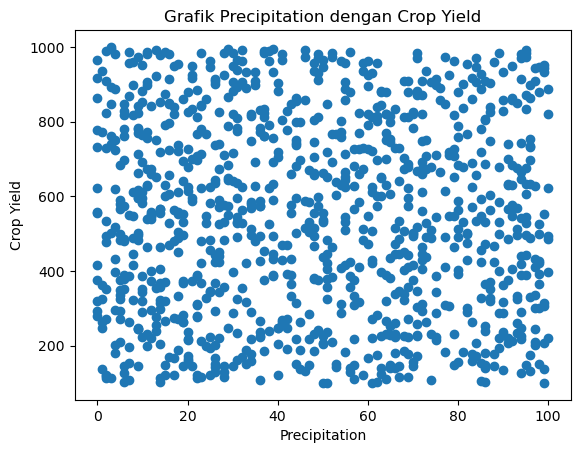

In [23]:
# Membuat Scatter Plot
plt.scatter(df_precip['Precipitation'], df_precip['Crop Yield'])
plt.xlabel("Precipitation")
plt.ylabel("Crop Yield")
plt.title("Grafik Precipitation dengan Crop Yield")
plt.show()

# Meng-split Data Menjadi Training Set dan Testing Set

In [24]:
# Split data training set dan testing set
x_train, x_test = train_test_split(df_precip, test_size=0.2, random_state=42)
print(x_train)

     Precipitation  Crop Yield
29              69         271
535             51         237
695             69         224
557             78         548
836             64         230
..             ...         ...
106             85         886
270             54         772
860             65         799
435             94         227
102             19         281

[800 rows x 2 columns]


# Training Set dan Corpus Creation

## Feature Scaling

In [25]:
# Menghitung Perhitungan Jarak Skala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("x_train =", x_train)
print("x_test =", x_test)

x_train = [[0.69       0.19      ]
 [0.51       0.15222222]
 [0.69       0.13777778]
 ...
 [0.65       0.77666667]
 [0.94       0.14111111]
 [0.19       0.20111111]]
x_test = [[0.32       0.07777778]
 [0.88       0.35888889]
 [0.01       0.74555556]
 [0.2        0.07222222]
 [0.15       0.29888889]
 [0.16       0.69333333]
 [0.23       0.01777778]
 [0.14       0.11666667]
 [0.88       0.95555556]
 [0.01       0.16444444]
 [0.39       0.99444444]
 [0.7        0.06333333]
 [0.26       0.29777778]
 [0.32       0.99      ]
 [0.12       0.82333333]
 [0.02       0.48222222]
 [0.1        0.55111111]
 [0.64       0.74444444]
 [0.53       0.74222222]
 [0.09       0.44111111]
 [0.07       0.01      ]
 [0.85       0.05888889]
 [0.66       0.38444444]
 [0.67       0.27333333]
 [0.05       0.44444444]
 [0.65       0.37111111]
 [0.35       0.92444444]
 [0.43       0.83      ]
 [0.77       0.34555556]
 [0.73       0.72333333]
 [0.85       0.75555556]
 [0.83       0.90666667]
 [0.83       0.08555556]


# Model Creation and Training

## K-Means Clustering

In [26]:
# Menentukan kluster KMeans
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4)
kmean

KMeans(n_clusters=4)

In [27]:
# Melatih model menggunakan data training
y_cluster = kmean.fit_predict(x_train)
y_cluster

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 0, 3, 2,
       1, 0, 3, 3, 3, 2, 1, 2, 3, 3, 2, 2, 1, 0, 1, 1, 0, 3, 2, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 3, 2, 1, 1, 1, 1, 3, 3, 3,
       0, 0, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 3, 1, 3, 3, 2, 2, 3, 0,
       1, 3, 3, 1, 2, 0, 3, 1, 3, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       0, 3, 3, 0, 2, 2, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1,
       0, 3, 2, 3, 2, 0, 1, 0, 0, 1, 1, 0, 3, 1, 3, 0, 3, 0, 1, 0, 0, 1,
       3, 1, 0, 3, 3, 0, 0, 2, 3, 2, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 1, 2,
       3, 2, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 1, 0, 0, 3, 1, 1, 2,
       2, 0, 2, 2, 0, 1, 3, 3, 1, 3, 1, 3, 2, 2, 3, 0, 3, 3, 2, 2, 0, 3,
       3, 3, 3, 2, 2, 3, 3, 0, 3, 0, 1, 2, 3, 0, 1, 3, 1, 0, 1, 3, 2, 1,
       1, 0, 3, 3, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 1, 1, 3,
       0, 1, 0, 3, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 3, 2, 1, 1,
       0, 3, 1, 1, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 0,

In [28]:
# Menentukan nilai prediksi dari data testing
y_pred = kmean.predict(x_test)
y_pred

array([0, 2, 3, 0, 0, 3, 0, 0, 1, 0, 3, 2, 0, 3, 3, 3, 3, 1, 1, 0, 0, 2,
       2, 2, 0, 2, 3, 3, 2, 1, 1, 1, 2, 0, 1, 3, 3, 2, 3, 2, 2, 1, 1, 2,
       3, 3, 2, 0, 1, 0, 2, 1, 1, 3, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1,
       1, 3, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 1, 0, 3,
       2, 3, 3, 2, 3, 1, 0, 3, 2, 1, 1, 3, 0, 3, 3, 2, 2, 1, 0, 1, 0, 1,
       3, 3, 1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 3, 3, 0, 2, 2, 1, 2, 3,
       2, 1, 2, 3, 3, 2, 0, 3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 0, 0, 0, 0, 3,
       2, 3, 0, 3, 0, 3, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 1, 0,
       2, 2, 0, 1, 3, 3, 3, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 3, 1, 0, 1,
       3, 0])

In [29]:
# Mencari Titik Centroid
centroids = kmean.cluster_centers_

# Visualisasi Data Hasil Clustering

C:\Users\rr411\AppData\Local\Temp\ipykernel_21396\1667611091.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[0,0], centroids[0,1], cmap='rainbow', marker='*', s=150, label='Centroid 0')
C:\Users\rr411\AppData\Local\Temp\ipykernel_21396\1667611091.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[1,0], centroids[1,1], cmap='rainbow', marker='*', s=150, label='Centroid 1')
C:\Users\rr411\AppData\Local\Temp\ipykernel_21396\1667611091.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[2,0], centroids[2,1], cmap='rainbow', marker='*', s=150, label='Centroid 2')
C:\Users\rr411\AppData\Local\Temp\ipykernel_21396\1667611091.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[3,0], centroids[3,1], cmap='rainbow', marke

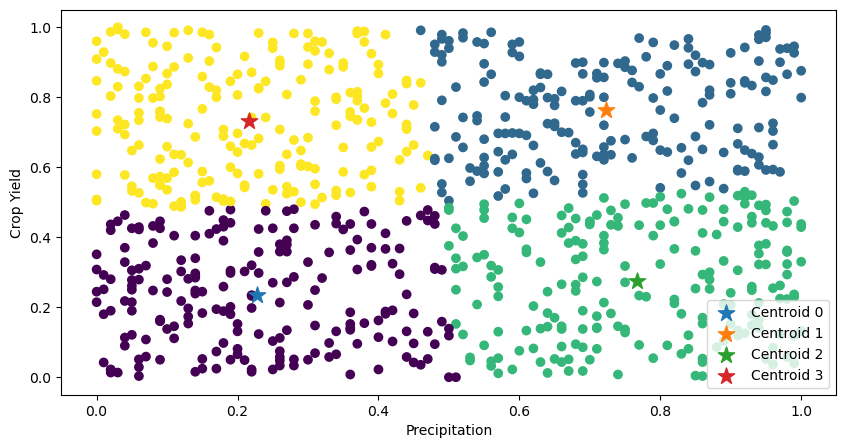

In [30]:
# Membuat Scatter Plot untuk letak posisi centroid dengan hasil kluster
plt.figure(figsize=(10, 5))
plt.scatter(x_train[:,0], x_train[:,1], c=kmean.labels_)

# Centroid 0
plt.scatter(centroids[0,0], centroids[0,1], cmap='rainbow', marker='*', s=150, label='Centroid 0')

# Centroid 1
plt.scatter(centroids[1,0], centroids[1,1], cmap='rainbow', marker='*', s=150, label='Centroid 1')

# Centroid 2
plt.scatter(centroids[2,0], centroids[2,1], cmap='rainbow', marker='*', s=150, label='Centroid 2')

# Centroid 3
plt.scatter(centroids[3,0], centroids[3,1], cmap='rainbow', marker='*', s=150, label='Centroid 3')

plt.xlabel("Precipitation")
plt.ylabel("Crop Yield")
plt.legend()
plt.show()

In [31]:
# Kesimpulan
""" Dari grafik tersebut didapatkan bahwa terdapat 4 cluster dari hubungan antara precipitation dan crop yield yang ditandai dengan warna yang berbeda.
1. Pada kelompok ungu (atas kanan) : menunjukkan kelompok dengan hasil panen yang tinggi berkisar 0.5-1 dengan curah hujan rendah berkisar 0-0.5.
2. Pada kelompok biru (bawah kiri) : menunjukkan kelompok dengan hasil panen yang rendah berkisar 0-0.5 dengan curah hujan rendah berkisar 0-0.5.
3. Pada kelompok hijau (bawah kanan) : menunjukkan kelompok dengan hasil panen yang rendah berkisar 0-0.5 dengan curah hujan tinggi berkisar 0.5-1.
4. Pada kelompok kuning (atas kiri) : menunjukkan kelompok dengan hasil panen yang tinggi berkisar 0.5-1 dengan curah hujan tinggi berkisar 0.5-1.

Dari pengelompokan tersebut dapat disimpulkan bahwa hasil panen tidak bergantung hanya kepada curah hujan saja karena dengan curah hujan yang sama dapat menghasilkan hasil panen yang berbeda yang artinya hasil panen optimal bisa didapatkan pada kondisi curah hujan yang rendah maupun tinggi. Hal tersebut tergantung pada beberapa faktor yang lainnya."""

' Dari grafik tersebut didapatkan bahwa terdapat 4 cluster dari hubungan antara precipitation dan crop yield yang ditandai dengan warna yang berbeda.\n1. Pada kelompok ungu (atas kanan) : menunjukkan kelompok dengan hasil panen yang tinggi berkisar 0.5-1 dengan curah hujan rendah berkisar 0-0.5.\n2. Pada kelompok biru (bawah kiri) : menunjukkan kelompok dengan hasil panen yang rendah berkisar 0-0.5 dengan curah hujan rendah berkisar 0-0.5.\n3. Pada kelompok hijau (bawah kanan) : menunjukkan kelompok dengan hasil panen yang rendah berkisar 0-0.5 dengan curah hujan tinggi berkisar 0.5-1.\n4. Pada kelompok kuning (atas kiri) : menunjukkan kelompok dengan hasil panen yang tinggi berkisar 0.5-1 dengan curah hujan tinggi berkisar 0.5-1.\n\nDari pengelompokan tersebut dapat disimpulkan bahwa hasil panen tidak bergantung hanya kepada curah hujan saja karena dengan curah hujan yang sama dapat menghasilkan hasil panen yang berbeda yang artinya hasil panen optimal bisa didapatkan pada kondisi cur

# Model Evaluation

## Mencari K (Jumlah Cluster) Terbaik

In [32]:
# Menentukan apakah nilai K sudah terbaik dengan Elbow Method
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)
inertias

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[138.46984194444443,
 83.38120667901235,
 53.55208230063114,
 34.88259153297838,
 28.925850643982294,
 24.2874526350758,
 20.233545280361348,
 17.066767012050015,
 14.645947243072843]

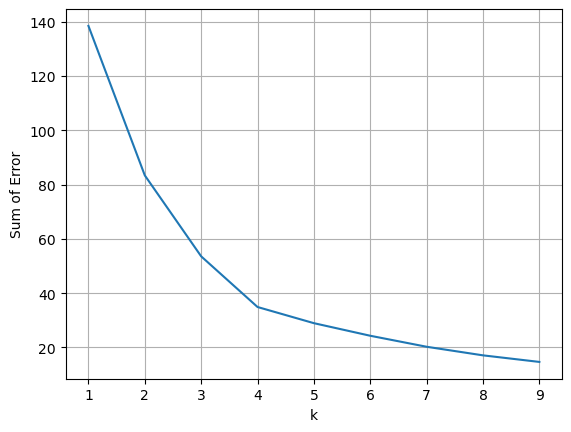

In [33]:
# Membuat grafik patahan siku
plt.xlabel('k')
plt.ylabel('Sum of Error')
plt.plot(k_range, inertias)
plt.grid()

In [34]:
# Kesimpulan
"""Dapat dilihat pada gambar di atas bahwa terdapat siku di angka 4 sehingga nilai K terbaik adalah 4. Oleh karena itu, evaluasi model ini yaitu model k-means clustering pada data ini sudah tepat dengan menggunakan k yaitu 4."""

'Dapat dilihat pada gambar di atas bahwa terdapat siku di angka 4 sehingga nilai K terbaik adalah 4. Oleh karena itu, evaluasi model ini yaitu model k-means clustering pada data ini sudah tepat dengan menggunakan k yaitu 4.'

In [35]:
# Menggunakan Silhoutte Score
silhouette_avg = silhouette_score(x_test, y_pred)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.4311536642368369


In [36]:
# Kesimpulan
f"Didapatkan Silhouette score adalah {silhouette_avg}, dapat disimpulkan bahwa data telah dikelompokkan dengan cukup baik yang artinya sebagian besar data poin ditempatkan pada cluster yang tepat dan terdapat perbedaan yang cukup signifikan antara cluster yang berbeda."

'Didapatkan Silhouette score adalah 0.4311536642368369, dapat disimpulkan bahwa data telah dikelompokkan dengan cukup baik yang artinya sebagian besar data poin ditempatkan pada cluster yang tepat dan terdapat perbedaan yang cukup signifikan antara cluster yang berbeda.'

## Agglomerative Hierarchical Clustering

In [37]:
# Melatih model menggunakan data training
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_cluster = cluster.fit_predict(x_train)
y_cluster

array([1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 3, 1,
       2, 0, 3, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 3, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3,
       0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 3, 1, 0, 0, 2, 1, 0, 0,
       2, 3, 3, 2, 1, 0, 0, 2, 3, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1,
       0, 3, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 0, 2, 1, 0, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 3, 0, 3, 0, 2, 1, 0, 2,
       0, 2, 0, 3, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2,
       3, 2, 0, 3, 2, 0, 0, 1, 3, 0, 1, 0, 1, 1, 1, 2, 1, 0, 3, 2, 2, 1,
       2, 1, 1, 2, 0, 2, 3, 0, 2, 3, 3, 3, 1, 2, 3, 0, 0, 3, 2, 1, 0, 3,
       0, 3, 3, 1, 1, 3, 3, 0, 3, 0, 2, 1, 3, 0, 2, 3, 2, 0, 2, 0, 1, 2,
       2, 0, 3, 3, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 2, 2, 2, 3,
       1, 2, 0, 3, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 3, 0, 0,

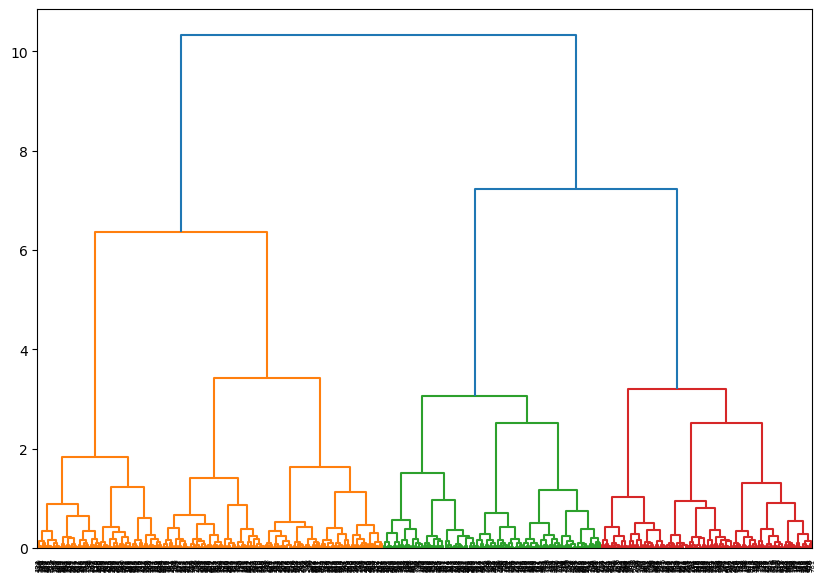

In [38]:
# Visualisasi Dendrogram
linked = linkage(x_train, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.show()

In [39]:
# Kesimpulan
""" Dari grafik dendrogram tersebut didapatkan bahwa terdapat 3 cluster utama dari hubungan antara precipitation dan crop yield yang ditandai dengan warna yang berbeda. Terdapat variasi yang cukup signifikan yang ditunjukkan dengan tinggi maksimum dendrogram mencapai nilai 10. Kelompok yang berada dalam warna yang sama memiliki karakteristik yang mirip dan semakin tinggi garis penghubung antar kelompok, semakin besar pula perbedaan karakteristiknya. Didapatkan bahwa terdapat perbedaan terbesar terjadi pada cluster utama dan beberapa cluster memiliki kemiripan yang tinggi."""

' Dari grafik dendrogram tersebut didapatkan bahwa terdapat 3 cluster utama dari hubungan antara precipitation dan crop yield yang ditandai dengan warna yang berbeda. Terdapat variasi yang cukup signifikan yang ditunjukkan dengan tinggi maksimum dendrogram mencapai nilai 10. Kelompok yang berada dalam warna yang sama memiliki karakteristik yang mirip dan semakin tinggi garis penghubung antar kelompok, semakin besar pula perbedaan karakteristiknya. Didapatkan bahwa terdapat perbedaan terbesar terjadi pada cluster utama dan beberapa cluster memiliki kemiripan yang tinggi.'

In [40]:
# Melatih model menggunakan data training kembali menggunakan jumlah cluster terbaik yaitu 2
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_cluster = cluster.fit_predict(x_train)
y_cluster

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [41]:
# Menentukan nilai prediksi dari data testing
y_pred = cluster.fit_predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [42]:
# Menggunakan Silhoutte Score
silhouette_avg = silhouette_score(x_test, y_pred)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.37896834347586994


In [43]:
# Kesimpulan
f"Didapatkan Silhouette score adalah {silhouette_avg}, dapat disimpulkan bahwa data telah dikelompokkan dengan cukup baik yang artinya sebagian besar data poin ditempatkan pada cluster yang tepat dan terdapat perbedaan yang cukup signifikan antara cluster yang berbeda."

'Didapatkan Silhouette score adalah 0.37896834347586994, dapat disimpulkan bahwa data telah dikelompokkan dengan cukup baik yang artinya sebagian besar data poin ditempatkan pada cluster yang tepat dan terdapat perbedaan yang cukup signifikan antara cluster yang berbeda.'

# Best Model Selection and Evaluation

In [44]:
""" Dari kesimpulan yang didapatkan pada masing-masing model diketahui bahwa Silhouette score dari metode k-means clustering lebih mendekati angka 1 dibandingkan Silhouette score pada metode agglomerative hierarchical clustering sehingga model terbaik dari kedua metode tersebut untuk pemecahan masalah pada permasalahan ini adalah model k-means clustering."""

' Dari kesimpulan yang didapatkan pada masing-masing model diketahui bahwa Silhouette score dari metode k-means clustering lebih mendekati angka 1 dibandingkan Silhouette score pada metode agglomerative hierarchical clustering sehingga model terbaik dari kedua metode tersebut untuk pemecahan masalah pada permasalahan ini adalah model k-means clustering.'